In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
datadir_name = 'names'
path_to_datadir = ''.join((os.getcwd(), '\\', datadir_name, '\\'))
datadir_list = os.listdir(path=path_to_datadir)
df_by_years_list = (pd.read_csv(path_to_datadir + f, header=None, names=['Name', 'Sex', 'Quantity']).assign(Year=int(f[3:7])) 
                        for f in datadir_list)
df_all_names = pd.concat(df_by_years_list)
df_all_names = df_all_names.set_index(['Year'])

# Задание 1
Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

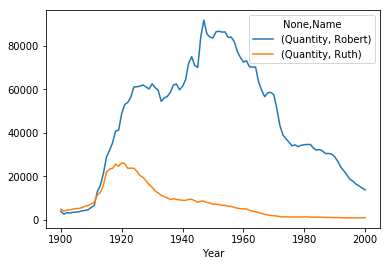

In [4]:
df_all_names_1 = df_all_names[(df_all_names['Name'].isin(['Ruth', 'Robert'])) & (df_all_names.index.isin(range(1900, 2001)))]
df_all_names_1 = df_all_names_1.groupby(['Name', 'Year']).sum()
df_all_names_1.unstack('Name').plot()

# Задание 2
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

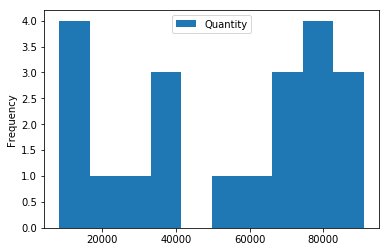

In [49]:
df_all_names_1 = df_all_names[(df_all_names['Name'].isin(['Ruth', 'Robert'])) & (df_all_names.index.isin(range(1900, 2001, 5)))]
df_all_names_1 = df_all_names_1.groupby(df_all_names_1.index).sum()
df_all_names_1.plot(kind='hist')

# Задание 3
Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год

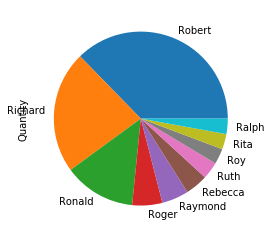

In [29]:
df_all_names_3 = df_all_names[(df_all_names['Name'].str[0] == 'R') & (df_all_names.index == 1950)]
df_all_names_3 = df_all_names_3.groupby(['Name']).sum().sort_values(['Quantity'], ascending=False).head(10)     
df_all_names_3.plot(kind='pie', y='Quantity', legend=False)

# Задание 4
Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений"

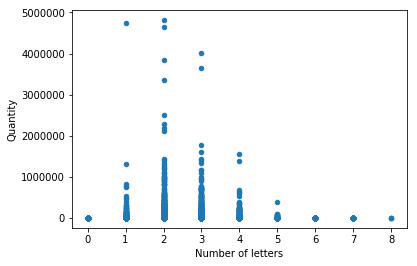

In [47]:
df_all_names_4 = df_all_names[(df_all_names.index.isin(range(1900, 2001)))].groupby(['Name']).sum()
df_all_names_4['Number of letters'] = sum(df_all_names_4.index.str.count(l) for l in 'AEIOUYaeiouy')
df_all_names_4.plot(kind='scatter', x='Number of letters', y='Quantity', style='o')